Лабораторна робота №8
Студента СА-43
Мозоля Назарія

In [36]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [37]:
!unzip -o ./drive/MyDrive/DeepL/archive2.zip -d ./dataset

Archive:  ./drive/MyDrive/DeepL/archive2.zip
  inflating: ./dataset/test.csv      
  inflating: ./dataset/train.csv     


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv('dataset/train.csv', delimiter=';', header=[0])

In [78]:
df.drop(columns=['id'], inplace=True)

In [79]:
# x=df[df.columns[:-1]]
x=df[df.columns]
y=df[df.columns[-1]]

In [42]:
x

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012,23,3,0,0,2,23.78,27.275,73,11.0014
1,2011,8,3,0,0,1,27.88,31.820,57,0.0000
2,2012,2,1,0,1,1,20.50,24.240,59,0.0000
3,2011,20,3,0,1,3,25.42,28.790,83,19.9995
4,2011,17,3,0,1,3,26.24,28.790,89,0.0000
...,...,...,...,...,...,...,...,...,...,...
7684,2012,18,1,0,1,1,13.94,15.150,42,22.0028
7685,2012,3,1,0,1,1,9.02,11.365,51,11.0014
7686,2012,15,2,0,0,1,21.32,25.000,19,27.9993
7687,2011,19,4,0,1,1,12.30,14.395,45,15.0013


In [43]:
len(x.columns)

10

Year-рік о


In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7689 non-null   int64  
 1   hour        7689 non-null   int64  
 2   season      7689 non-null   int64  
 3   holiday     7689 non-null   int64  
 4   workingday  7689 non-null   int64  
 5   weather     7689 non-null   int64  
 6   temp        7689 non-null   float64
 7   atemp       7689 non-null   float64
 8   humidity    7689 non-null   int64  
 9   windspeed   7689 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 600.8 KB


Жодних категоріальних та жодних нулів для дропу

In [45]:
x.describe()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,2011.495513,11.565353,2.506178,0.029002,0.677331,1.410066,20.267085,23.696581,61.771492,12.802070
std,0.500012,6.915777,1.115935,0.167824,0.467528,0.628004,7.824066,8.514199,19.302151,8.178889
min,2011.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000
25%,2011.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500
50%,2011.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000
75%,2012.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900
max,2012.000000,23.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900


In [ ]:
x.describe()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,2011.495513,11.565353,2.506178,0.029002,0.677331,1.410066,20.267085,23.696581,61.771492,12.802070
std,0.500012,6.915777,1.115935,0.167824,0.467528,0.628004,7.824066,8.514199,19.302151,8.178889
min,2011.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000
25%,2011.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500
50%,2011.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000
75%,2012.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900
max,2012.000000,23.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900


In [46]:
y

0       133
1       132
2        19
3        58
4       285
       ... 
7684    457
7685      1
7686    626
7687    217
7688    381
Name: count, Length: 7689, dtype: int64

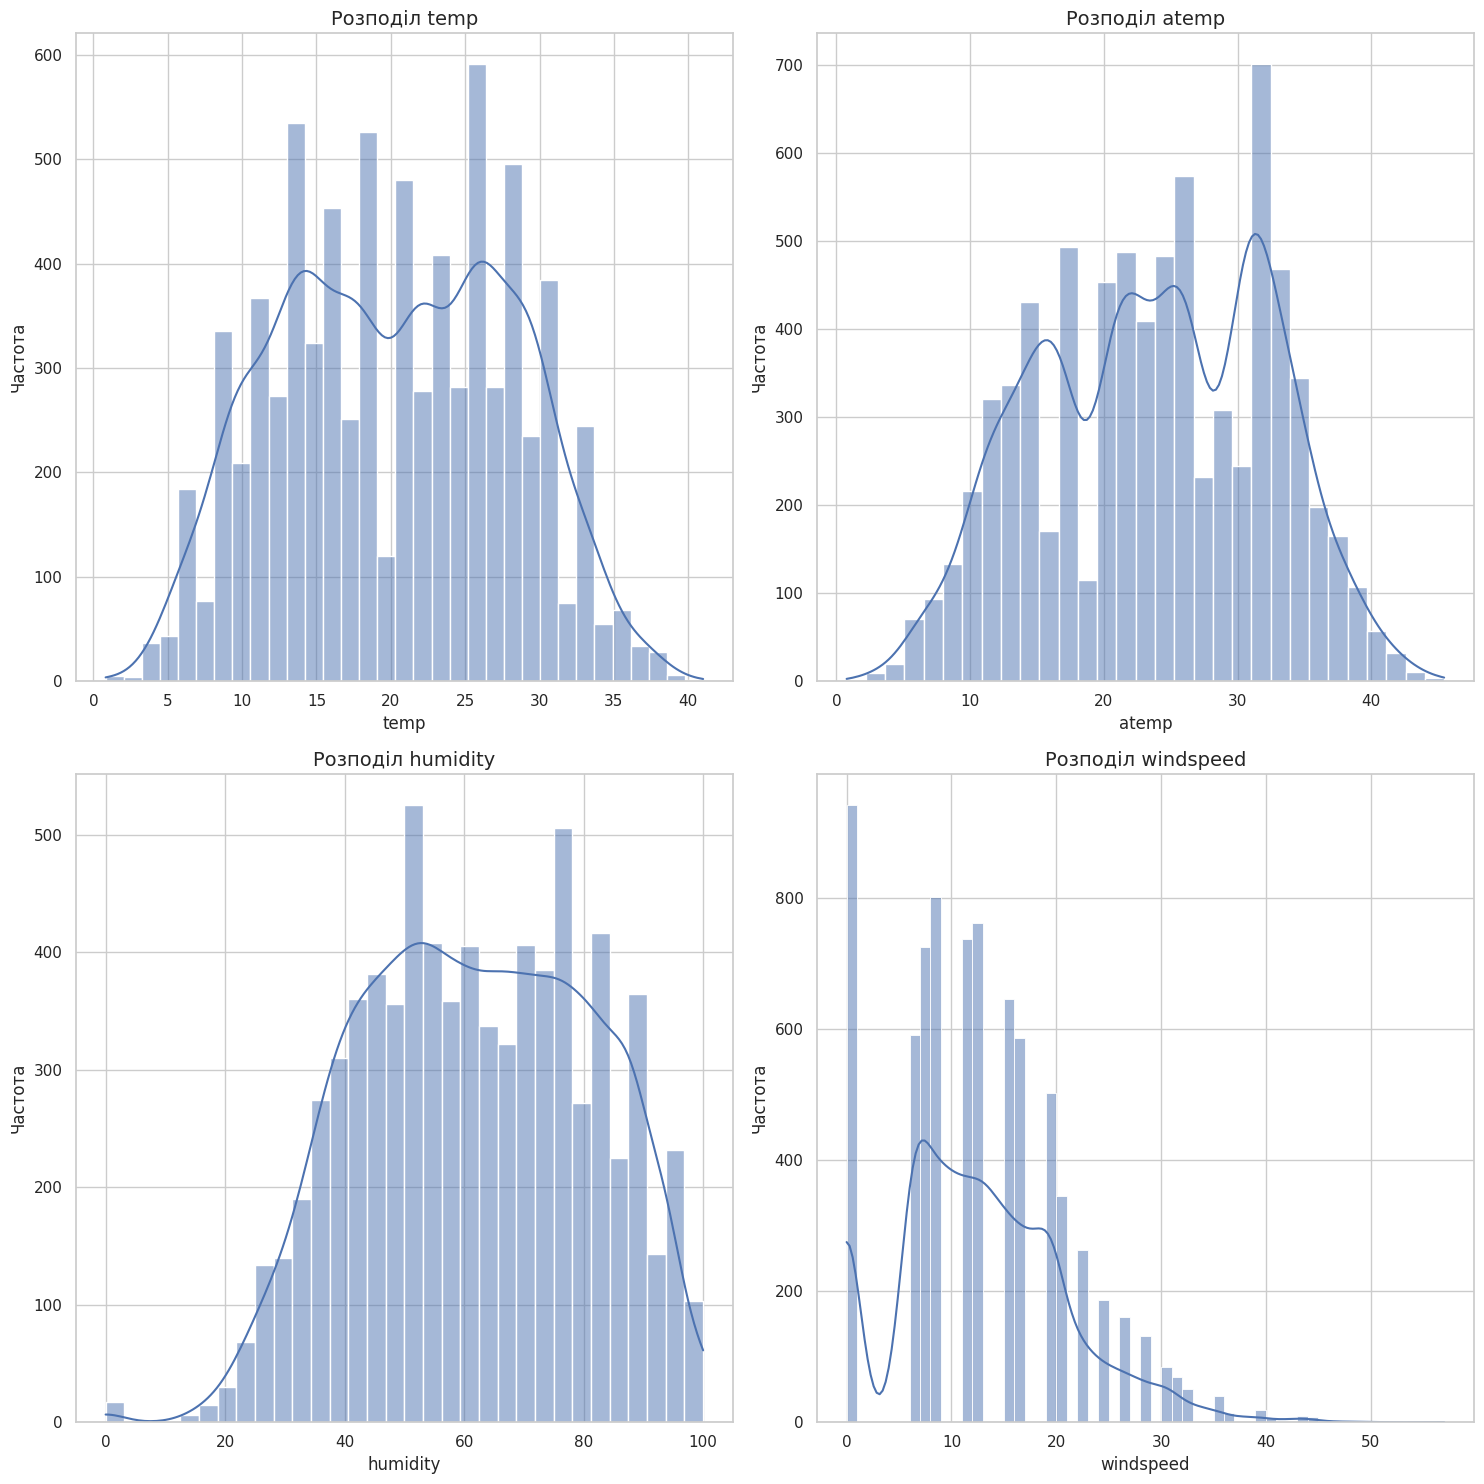

In [47]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

variables = ['temp', 'atemp', 'humidity', 'windspeed']
for ax, var in zip(axs.flat, variables):
    sns.histplot(x[var], kde=True, ax=ax)
    ax.set_title(f'Розподіл {var}', fontsize=14)
    ax.set_xlabel(var)
    ax.set_ylabel('Частота')


plt.tight_layout()
plt.show()

Нічого з вищеперерахованого не вимагає логарифмічного аналізу

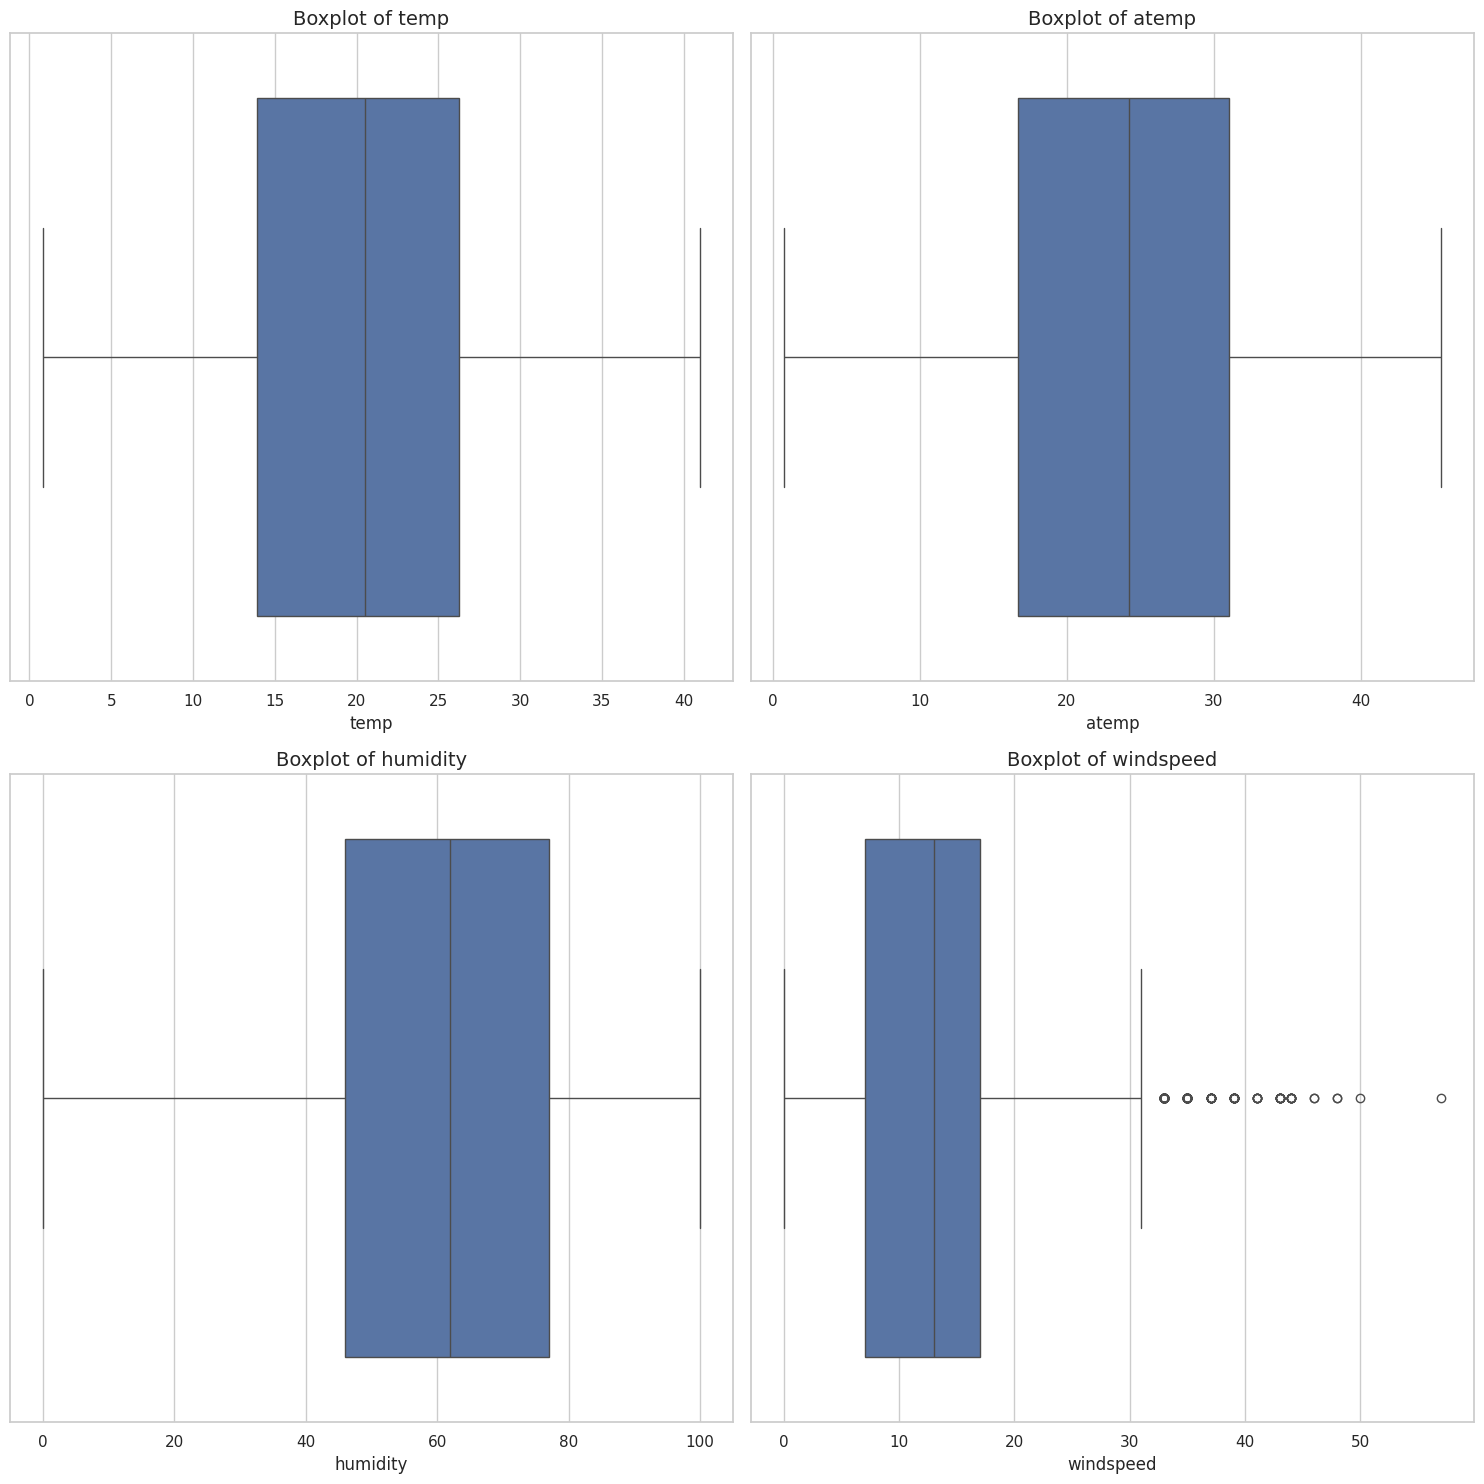

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for ax, var in zip(axs.flat, variables):
    sns.boxplot(x=x[var], ax=ax)
    ax.set_title(f'Вкиди of {var}', fontsize=14)


plt.tight_layout()
plt.show()


Швидкість вітру на вищом кінці має дуже багато вкидів. Інші поводять себе добре

In [52]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7689 entries, 0 to 7688
Series name: count
Non-Null Count  Dtype
--------------  -----
7689 non-null   int64
dtypes: int64(1)
memory usage: 60.2 KB


In [53]:
y.describe()

count    7689.000000
mean      191.419430
std       182.140265
min         1.000000
25%        41.000000
50%       145.000000
75%       283.000000
max       977.000000
Name: count, dtype: float64

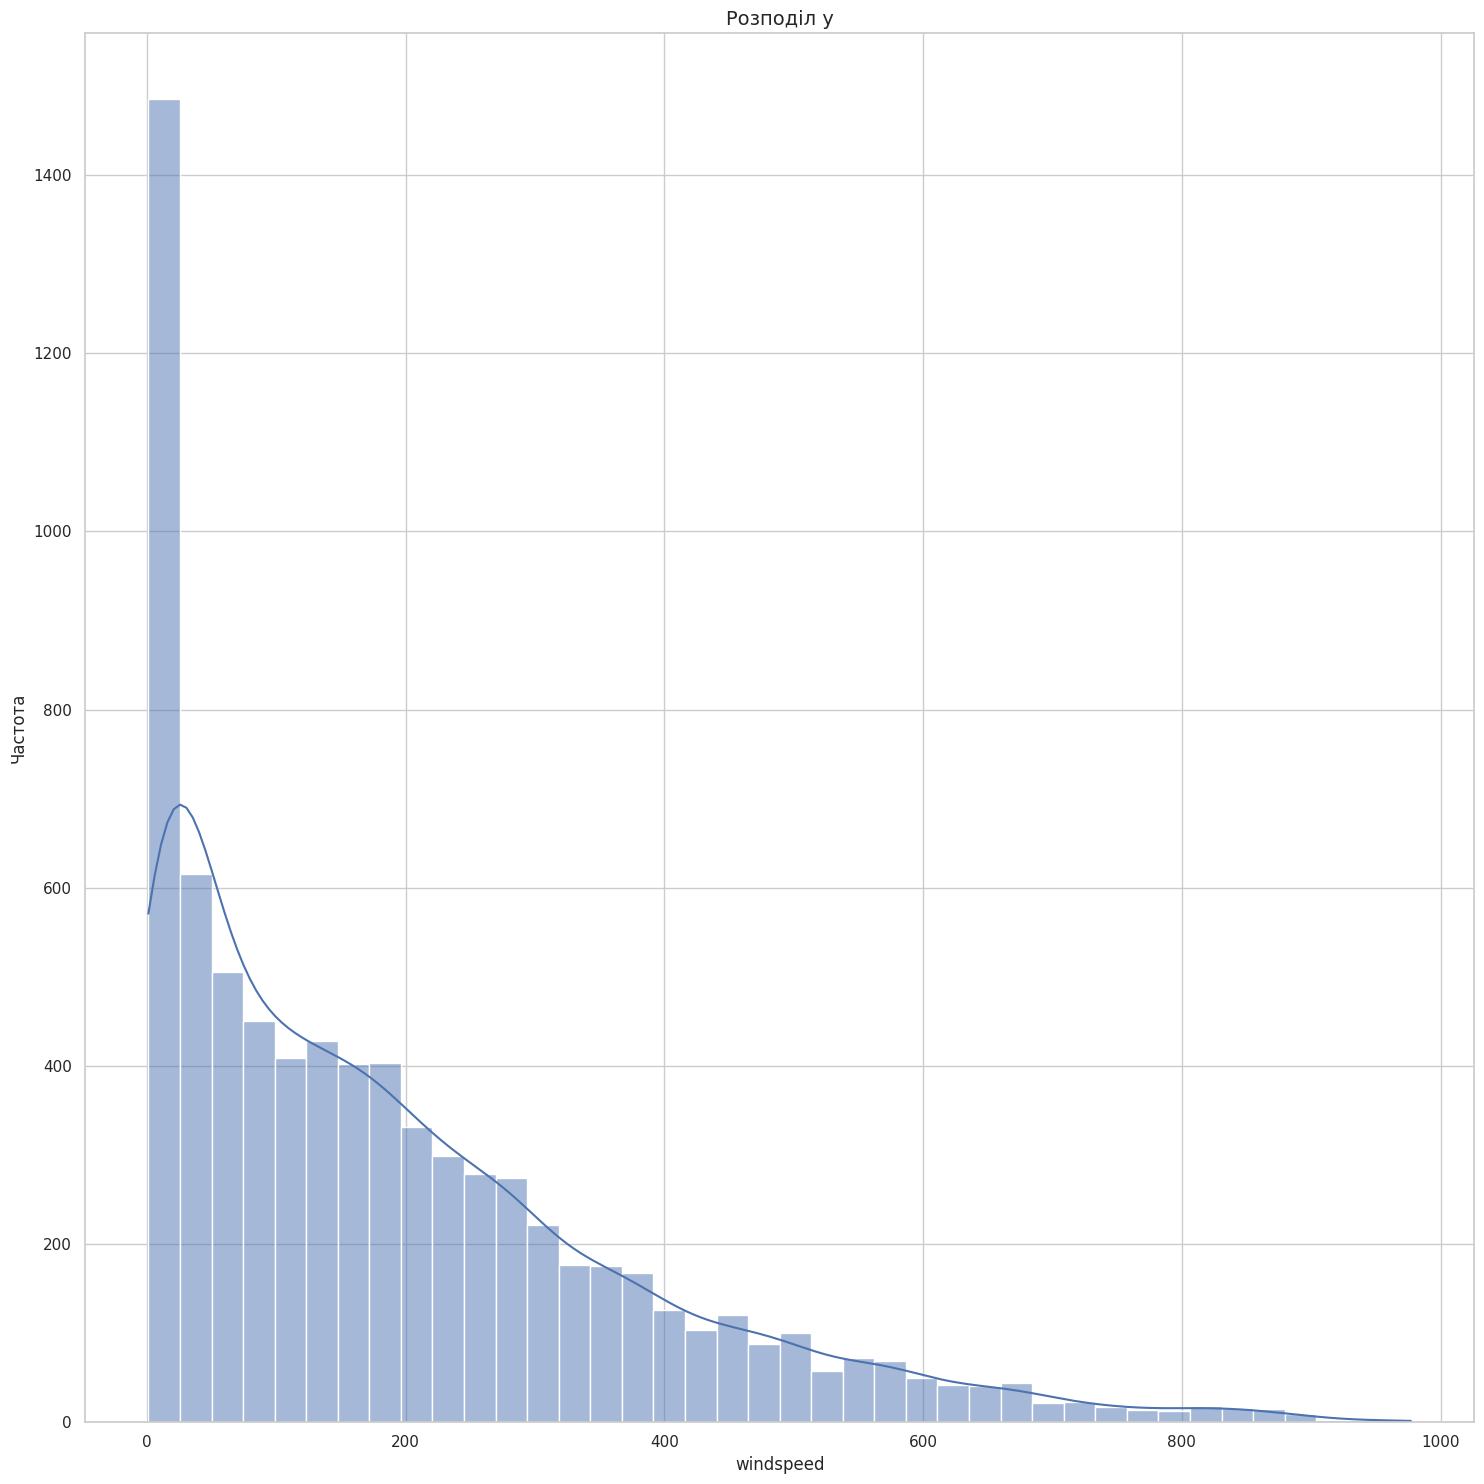

In [58]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(15, 15))



sns.histplot(y, kde=True, ax=ax)
ax.set_title(f'Розподіл y', fontsize=14)
ax.set_xlabel(var)
ax.set_ylabel('Частота')


plt.tight_layout()
plt.show()


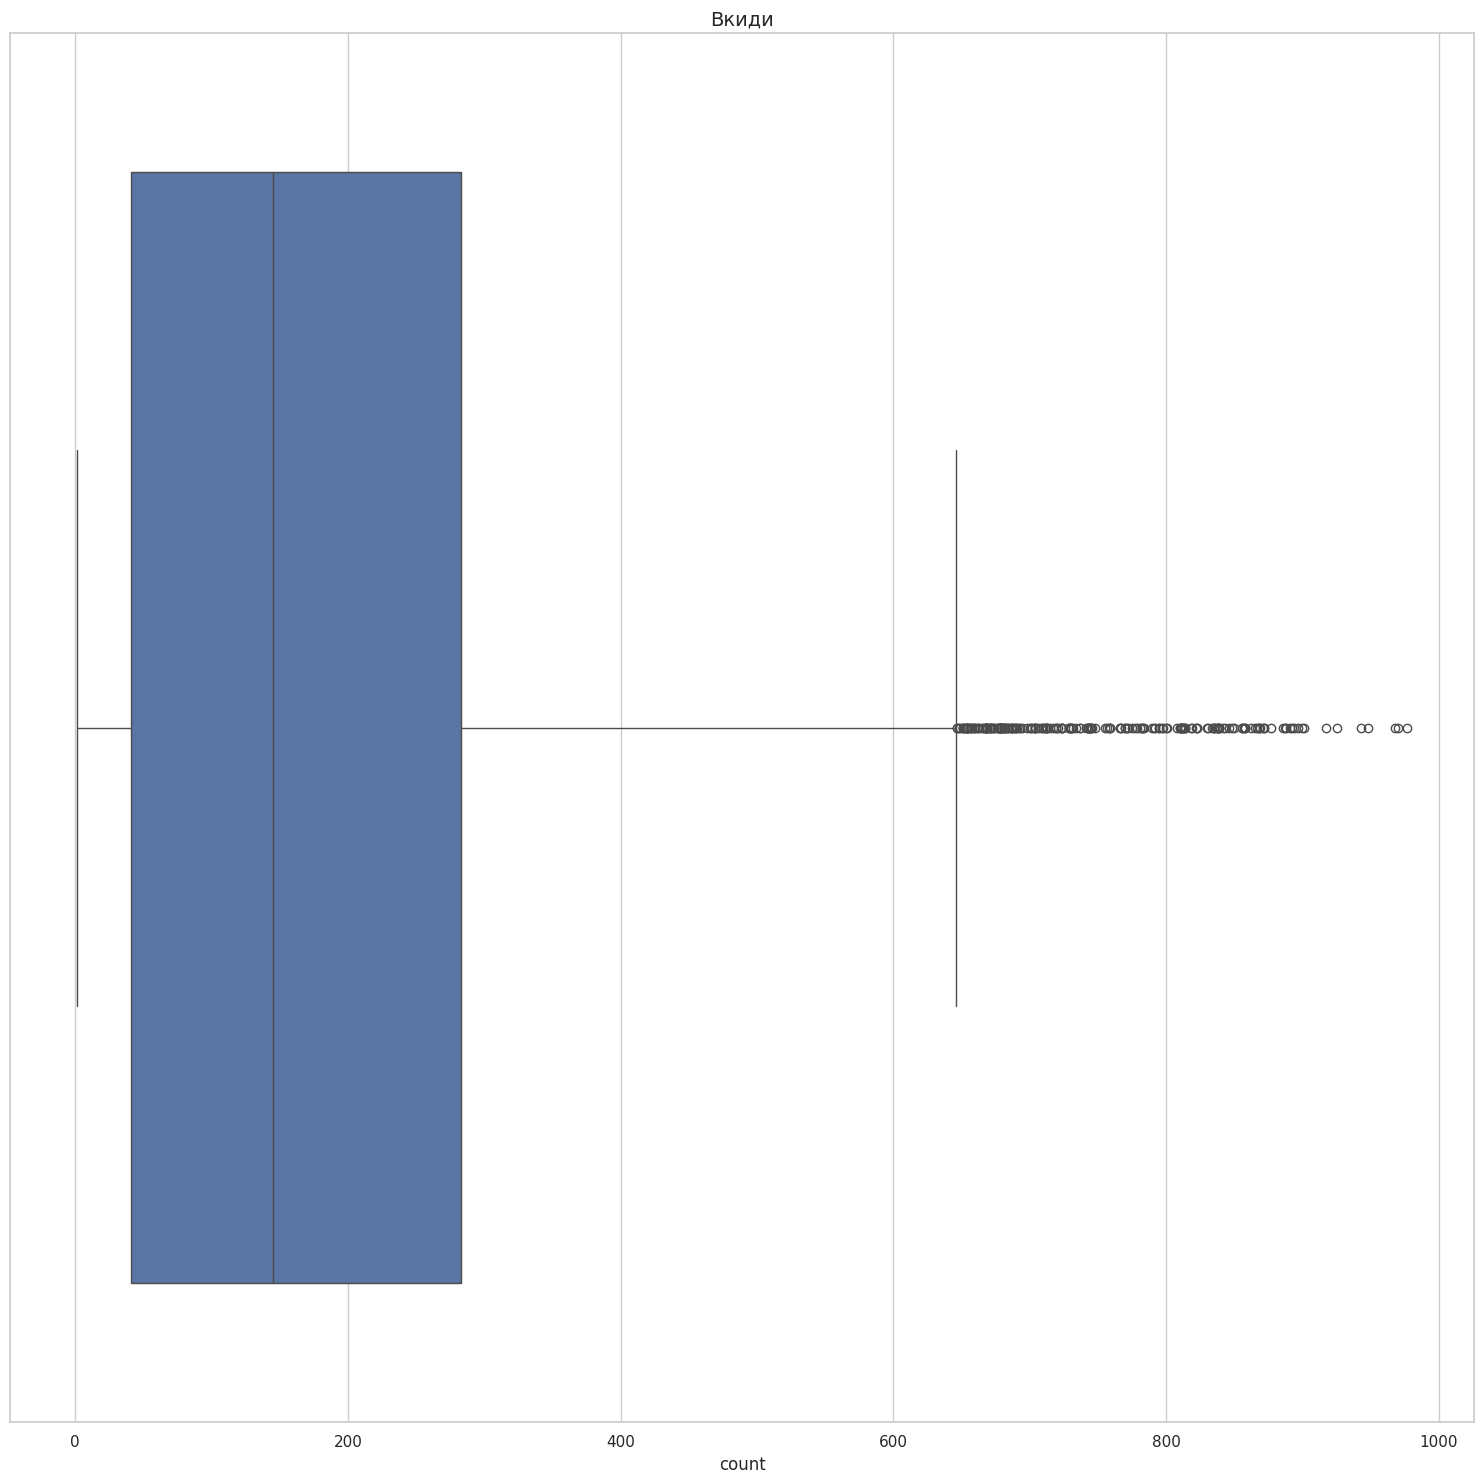

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

sns.boxplot(x=y, ax=ax)
ax.set_title(f'Вкиди', fontsize=14)


plt.tight_layout()
plt.show()


Використовуємо логарифм

In [66]:
y=pd.DataFrame({'count':y})

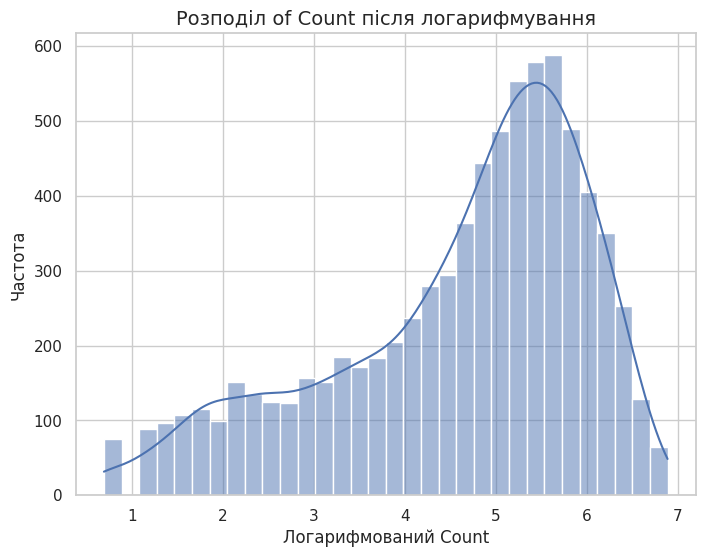

In [68]:
y['log_count'] = np.log1p(y['count'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(y['log_count'], kde=True, ax=ax)
ax.set_title('Розподіл of Count після логарифмування', fontsize=14)
ax.set_xlabel('Логарифмований Count')
ax.set_ylabel('Частота')
plt.show()


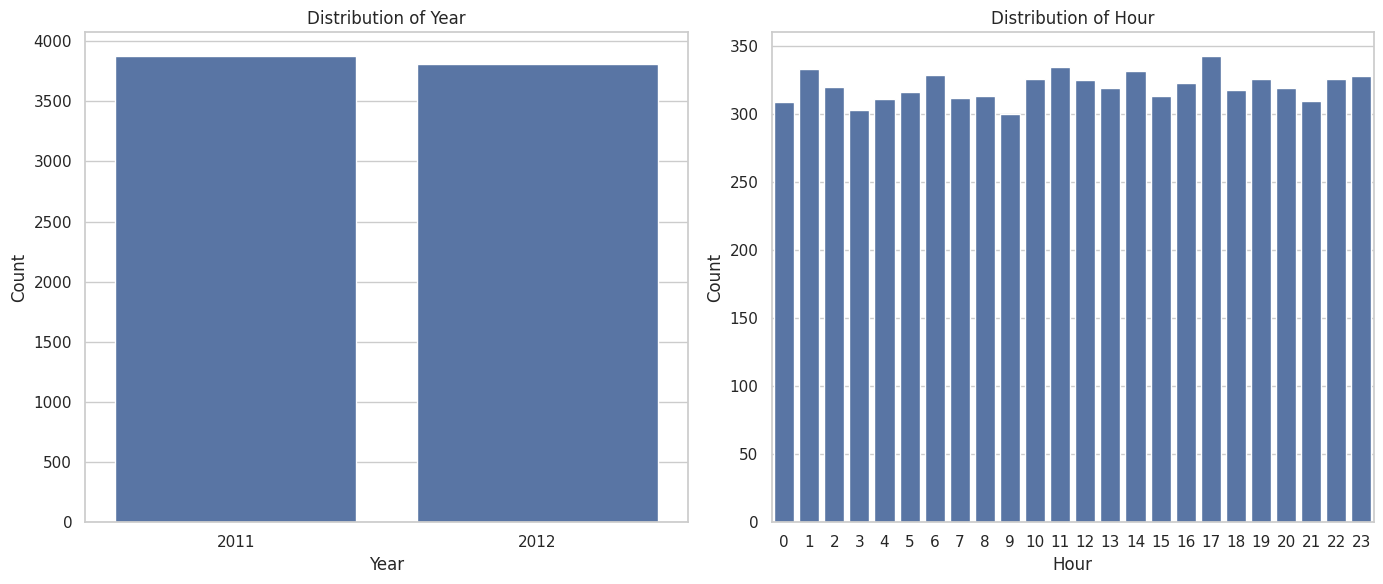

In [70]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Розподіл років
sns.countplot(x='year', data=x, ax=axs[0])
axs[0].set_title('Distribution of Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')

# Розподіл годин
sns.countplot(x='hour', data=x, ax=axs[1])
axs[1].set_title('Distribution of Hour')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [84]:
x = x[x.year != 2012]

In [85]:
# Для спрощення припустимо, що всі дані взяті з 1-го січня кожного з років
x['date'] = pd.to_datetime(x['year'], format='%Y') + pd.to_timedelta(x['hour'], unit='h')


x.set_index('date', inplace=True)


x.head()


,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
date,,,,,,,,,,,
2011-01-01 08:00:00,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2011-01-01 20:00:00,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
2011-01-01 17:00:00,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285
2011-01-01 19:00:00,2011,19,2,0,1,2,34.44,37.120,39,22.0028,326
2011-01-01 22:00:00,2011,22,3,0,1,1,25.42,27.275,94,0.0000,160


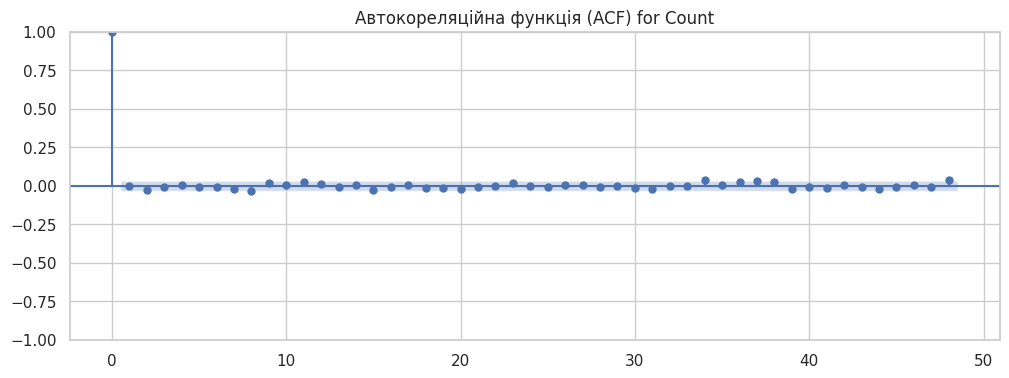

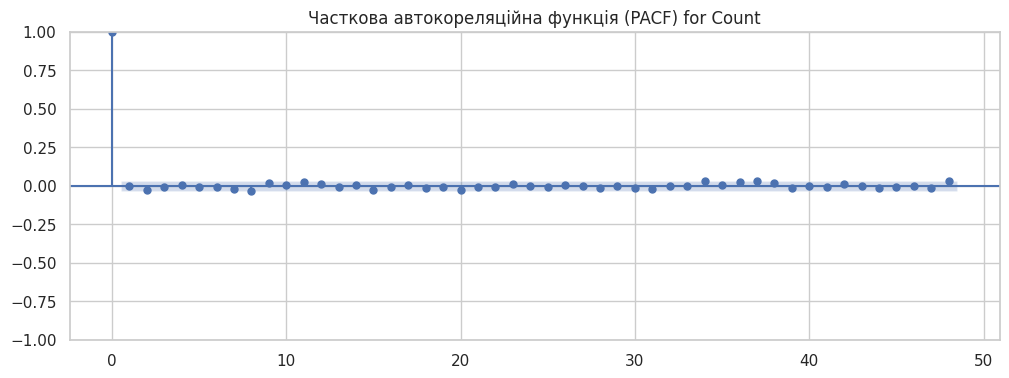

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(x['count'], lags=48, ax=ax)
ax.set_title('Автокореляційна функція (ACF) for Count')
plt.show()


fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(x['count'], lags=48, ax=ax)
ax.set_title('Часткова автокореляційна функція (PACF) for Count')
plt.show()


Короткострокова залежність (AR(1,2))

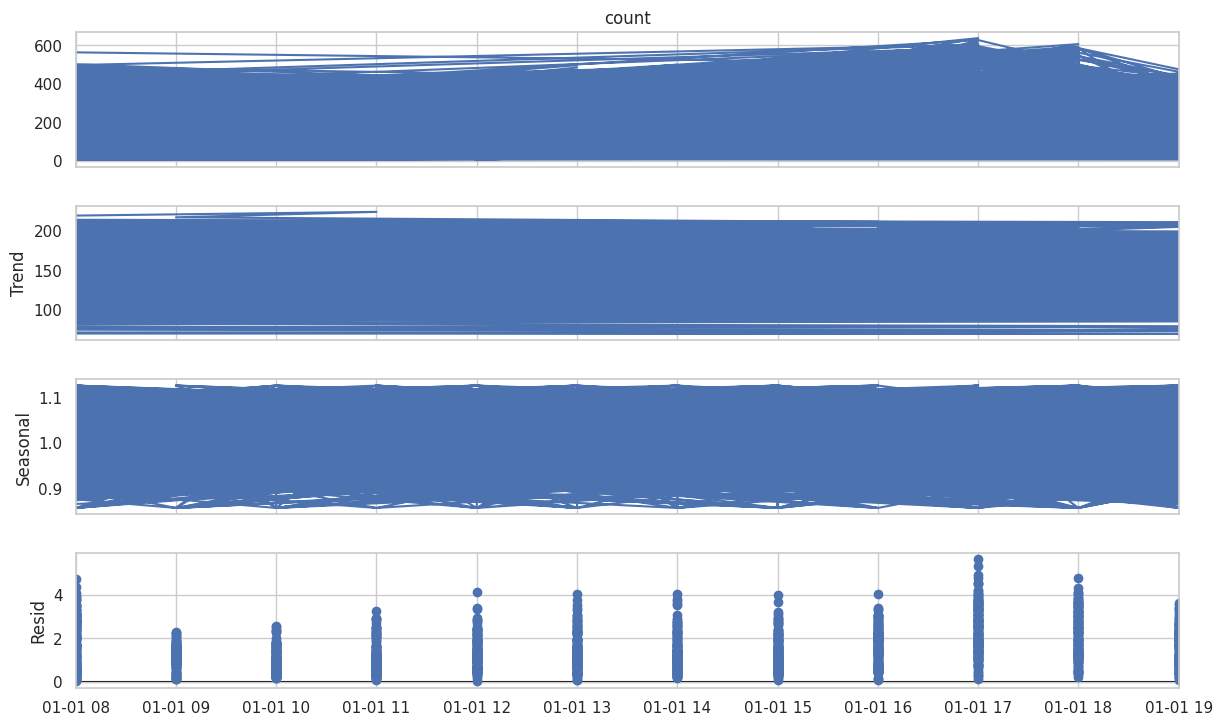

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(x['count'], model='mulitplicative', period=24)

fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()
